SMS Text Validation using 

In [1]:
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_table("D:\Python\pydata-dc-2016-tutorial-master\pydata-dc-2016-tutorial-master\sms.tsv", names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
# Map the label series into numerical data
df["label_num"] = df["label"].map({"spam": 0, "ham": 1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


##### Alternatively

le = LabelEncoder()
df["label_le"] = le.fit_transform(df["label"])
df.head()

In [6]:
X = df["message"]
y = df["label_num"]

X.shape, y.shape

((5572,), (5572,))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print("X Train : ", x_train.shape)
print("X Test : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (4457,)
X Test :  (1115,)
Y Train :  (4457,)
Y Test :  (1115,)


Note : Vectorization comes after splitting the dataset. This will help improve the model for accurate predictions of the future

#### Vectorization of the Dataset

In [8]:
vect = CountVectorizer()

In [9]:
vect.fit(x_train)
x_train_dtm = vect.transform(x_train) #Tranformation into a document-term matrix
x_train_dtm

<4457x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 59028 stored elements in Compressed Sparse Row format>

In [10]:
x_train_dtm = vect.fit_transform(x_train) # Fit involves learning the vocabulary while Transform creating the document-term matrix
x_train_dtm

<4457x7714 sparse matrix of type '<class 'numpy.int64'>'
	with 59028 stored elements in Compressed Sparse Row format>

Note : 41457 represents the number of observations or records while 7714 is the number of tokens / features

In [11]:
x_test_dtm = vect.fit_transform(x_test)
x_test_dtm

<1115x3567 sparse matrix of type '<class 'numpy.int64'>'
	with 15141 stored elements in Compressed Sparse Row format>

#### Building and Evaluating Model

In [12]:
nb_model = MultinomialNB()

In [13]:
%time nb_model.fit(x_train_dtm, y_train)

Wall time: 177 ms


MultinomialNB()

In [14]:
y_pred = nb_model.predict(x_train_dtm)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [15]:
acc_score = accuracy_score(y_pred, y_train)
round(acc_score*100)

99.0

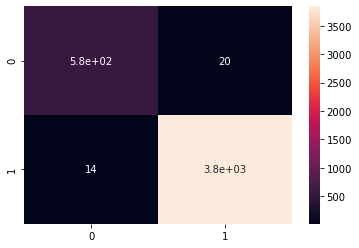

In [16]:
sb.heatmap(confusion_matrix(y_train, y_pred), annot = True)

In [17]:
# Calculate the predicted probability

predict_prob = nb_model.predict_proba(x_train_dtm)
predict_prob

array([[7.71098324e-18, 1.00000000e+00],
       [7.25996027e-06, 9.99992740e-01],
       [1.22233328e-09, 9.99999999e-01],
       ...,
       [4.52457276e-04, 9.99547543e-01],
       [1.00000000e+00, 4.50655241e-11],
       [4.74690812e-01, 5.25309188e-01]])

In [18]:
#roc_curve = roc_auc_score(predict_prob, y_test, multi_class="ovo")

In [19]:
tf_vect = TfidfVectorizer()
vect = tf_vect.fit_transform(x_train)

In [20]:
len(tf_vect.vocabulary_) # Number of tokens

7714

In [21]:
tf_vect.get_stop_words()

In [22]:
voc = tf_vect.vocabulary_ # Numerical values assigned to represent the text doc

In [23]:
print(vect)

  (0, 2380)	0.1308437537886782
  (0, 4477)	0.20675562886456172
  (0, 2411)	0.16250976586807625
  (0, 6913)	0.23089557324450238
  (0, 1635)	0.12404578825510211
  (0, 6233)	0.12384389448363708
  (0, 6080)	0.26505449977262396
  (0, 2798)	0.19121297625471936
  (0, 1581)	0.1250731954460717
  (0, 939)	0.14738508638439
  (0, 4875)	0.11547381569952815
  (0, 3943)	0.2409145553926833
  (0, 4988)	0.2811535365867891
  (0, 3156)	0.2811535365867891
  (0, 6892)	0.0768193842449111
  (0, 3909)	0.30331540638432436
  (0, 4816)	0.1242488592563759
  (0, 6797)	0.16849472225286138
  (0, 965)	0.10280753918516831
  (0, 1121)	0.12999280029833354
  (0, 5567)	0.3454660201132102
  (0, 7373)	0.26470544487118375
  (0, 7677)	0.1577213863167583
  (0, 1053)	0.12354323151083438
  (0, 7445)	0.16997692798595188
  :	:
  (4455, 3841)	0.19431610483645817
  (4455, 6251)	0.17801325208470473
  (4455, 4414)	0.16428960377068422
  (4455, 4609)	0.15623142554130443
  (4455, 315)	0.17584518330853818
  (4455, 2849)	0.16897297726640634

In [24]:
feature_names = tf_vect.get_feature_names()

for i in vect.nonzero()[1]:
    print(feature_names[i], " - ", vect[0, i])
    break

do  -  0.1308437537886782
